In [1]:
from pyciss import io
import gdal
plt.rcParams['image.interpolation'] = 'none'
%matplotlib notebook
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

In [2]:
import glob

In [3]:
cd /cassini_ringsdata/opus/N1467345680/

/cassini_ringsdata/opus/N1467345680


In [4]:
s = pd.Series(glob.glob('/cassini_ringsdata/opus/N*/*.map.dst.cal.cub'))

In [5]:
SOI_cubes = s[s.str.contains('N146734')]

In [6]:
SOI_cubes.values

array(['/cassini_ringsdata/opus/N1467347445/N1467347445_2.map.dst.cal.cub',
       '/cassini_ringsdata/opus/N1467347249/N1467347249_2.map.dst.cal.cub',
       '/cassini_ringsdata/opus/N1467345857/N1467345857_2.map.dst.cal.cub',
       '/cassini_ringsdata/opus/N1467345621/N1467345621_2.map.dst.cal.cub',
       '/cassini_ringsdata/opus/N1467345680/N1467345680_2.map.dst.cal.cub',
       '/cassini_ringsdata/opus/N1467345916/N1467345916_2.map.dst.cal.cub',
       '/cassini_ringsdata/opus/N1467346329/N1467346329_2.map.dst.cal.cub',
       '/cassini_ringsdata/opus/N1467345503/N1467345503_2.map.dst.cal.cub',
       '/cassini_ringsdata/opus/N1467346388/N1467346388_2.map.dst.cal.cub',
       '/cassini_ringsdata/opus/N1467347504/N1467347504_2.map.dst.cal.cub',
       '/cassini_ringsdata/opus/N1467346211/N1467346211_2.map.dst.cal.cub',
       '/cassini_ringsdata/opus/N1467345975/N1467345975_2.map.dst.cal.cub',
       '/cassini_ringsdata/opus/N1467346034/N1467346034_2.map.dst.cal.cub',
       '/cas

/usr/local/python/miniconda/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


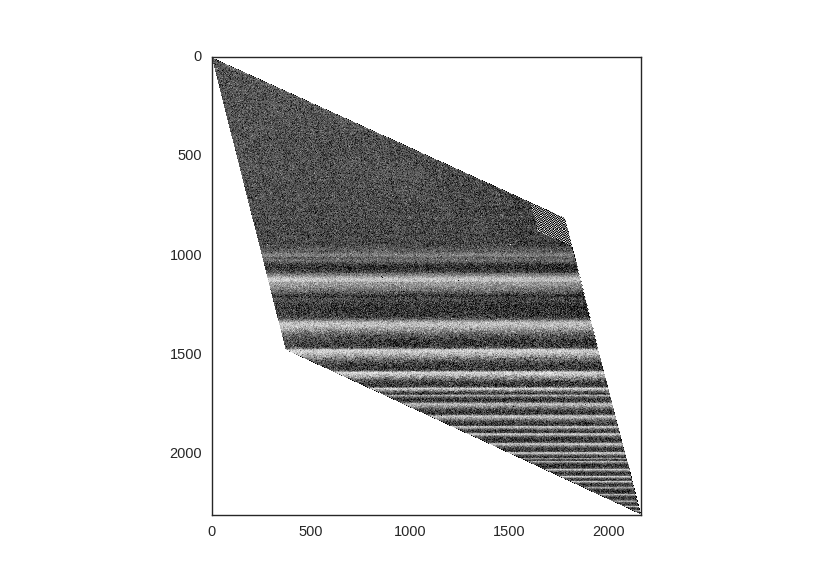

In [35]:
cube = io.RingCube.open('mapped.cub')
img = cube.img
img[img<0]=np.nan
ptop = np.percentile(img[~np.isnan(img)], 99)
plt.figure()
plt.imshow(img, vmax=ptop)

In [30]:
subframe = img[1320:1395,1320:1520]

<IPython.core.display.Javascript object>


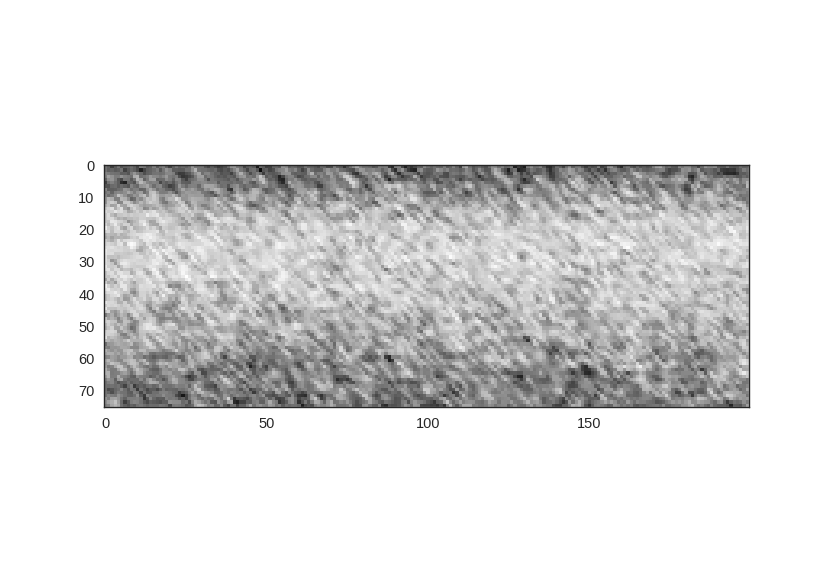

In [31]:
plt.figure()
ptop = np.percentile(img[~np.isnan(img)], 99)
plt.imshow(subframe, vmax=ptop)

In [128]:
mean_value = np.nanmean(subframe, axis=1)

In [129]:
subtracted = subframe - mean_value[:, np.newaxis]

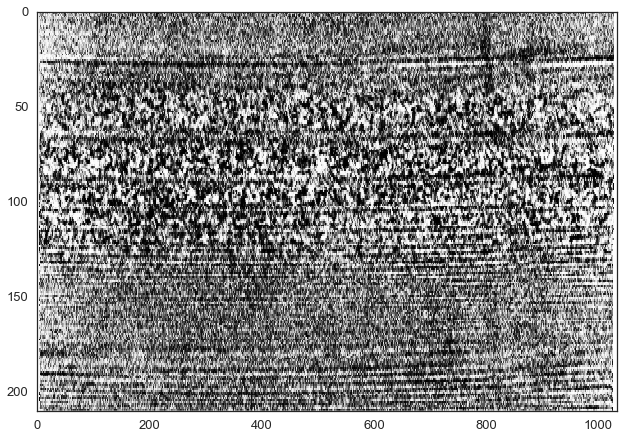

In [134]:
plt.imshow(equalize_hist(subtracted), interpolation=None)

In [33]:
toauto = subframe

In [42]:
testdata = np.zeros((100,100))
for i in range(100):
    testdata[i,i] = 1
    try:
        testdata[i, i+10] = 1
    except:
        pass

In [45]:
%matplotlib inline

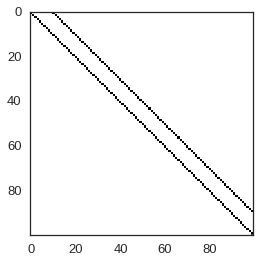

In [46]:
plt.figure()
plt.imshow(testdata)

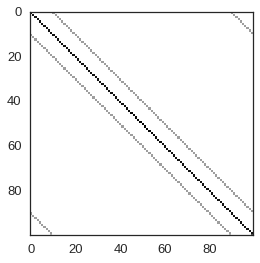

In [47]:
plt.imshow(do_autocorr(testdata))

In [29]:
from skimage.io import imread

In [78]:
%matplotlib notebook

<IPython.core.display.Javascript object>


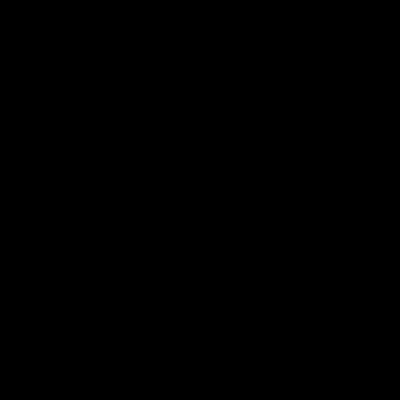

In [80]:
from pylab import figure, show, rand, subplots_adjust
from matplotlib.patches import Ellipse

NUM = 500

w = 1
ells = [Ellipse(xy=rand(2)*10, width=w, height=w*0.25, angle=rand()*3 +30)
        for i in range(NUM)]

fig = figure(figsize=(5,5))
ax = fig.add_subplot(111, aspect='equal')
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(1)
    e.set_facecolor('k')

subplots_adjust(top=1, bottom=0, left=0, right=1)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.axis('off')
plt.savefig('testimage.png',dpi=100, facecolor='w', edgecolor='w', transparent=True,
           aspect='auto')


In [65]:
from skimage.io import imread
data = imread('testimage.png', as_grey=True)

<IPython.core.display.Javascript object>


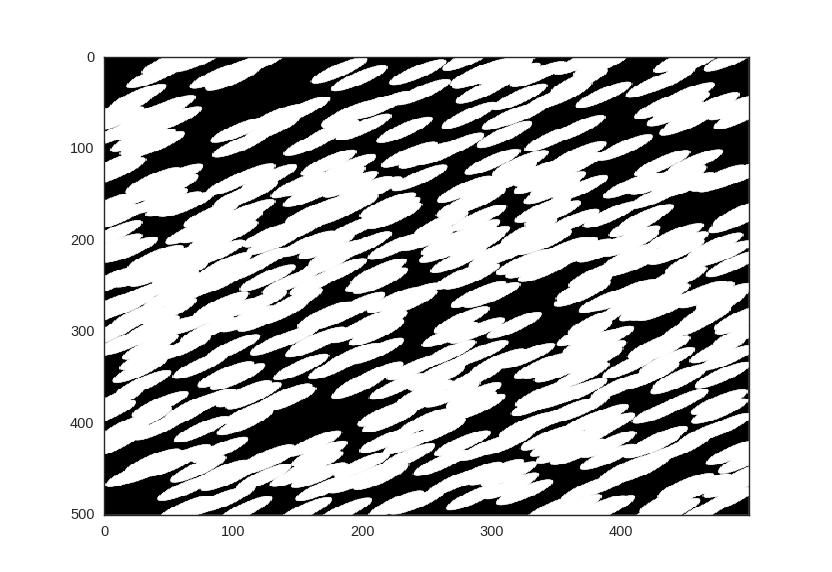

In [82]:
plt.figure()
plt.imshow(data, aspect='auto')

In [12]:
def do_autocorr(img):
    F1 = np.fft.fft2(img)
    psd = np.abs(F1)**2
    invert = np.fft.ifft2(psd)
    invert = np.fft.fftshift(invert)
    return invert.real

<IPython.core.display.Javascript object>


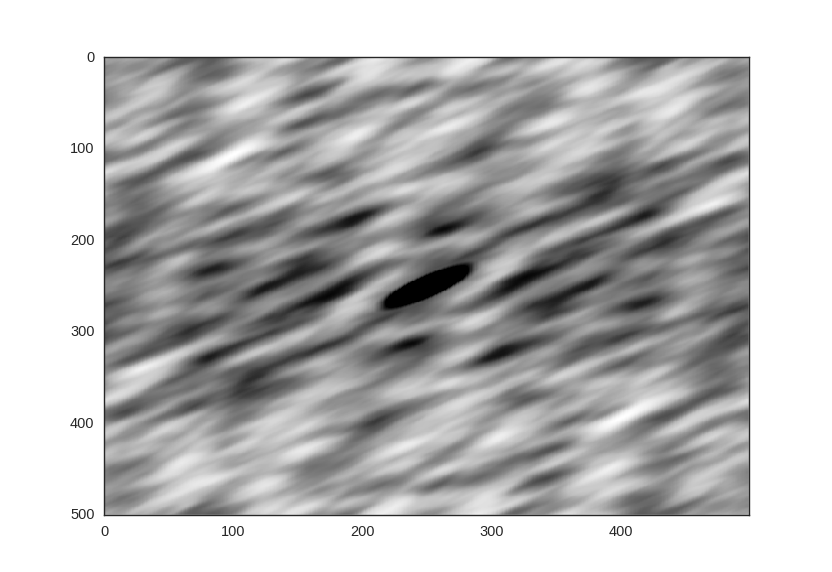

In [83]:
autocorr = do_autocorr(data)
plt.figure()
plow, phigh = np.percentile(autocorr, (0,99.5))
plt.imshow(autocorr, vmax=phigh, vmin=plow, aspect='auto')

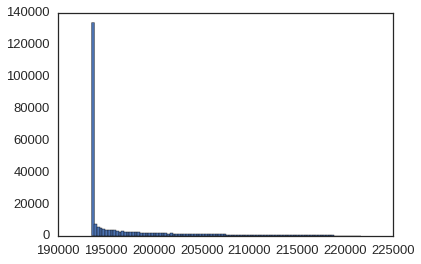

In [54]:
plt.hist(autocorr[~np.isnan(autocorr)].ravel(), 100);

<IPython.core.display.Javascript object>


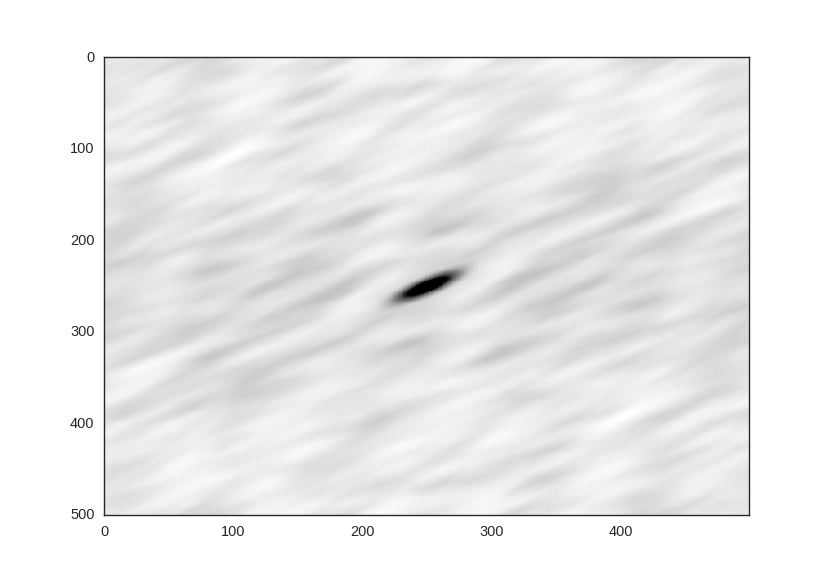

In [84]:
plt.figure()
plt.imshow(autocorr, vmax=np.percentile(autocorr, 99.9), aspect='auto')

In [71]:
double = np.log10(np.abs(do_autocorr(autocorr)))

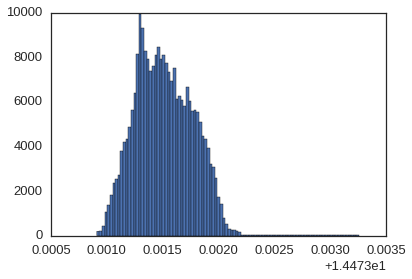

In [72]:
plt.hist(double.ravel(), 100);

In [73]:
double.max()

14.476259428375844

In [366]:
np.percentile(double, 90)

6.8233770785281447

<IPython.core.display.Javascript object>


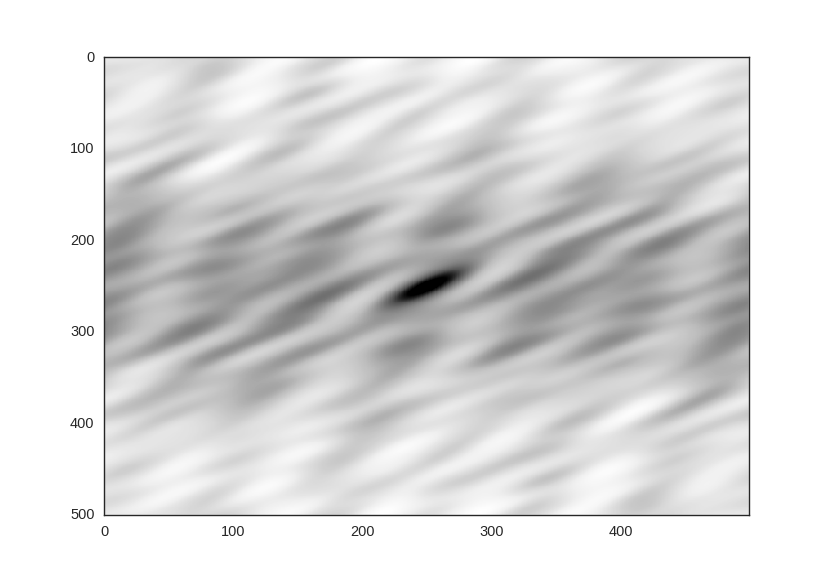

In [85]:
plt.figure()
plt.imshow(double, vmax=np.percentile(double, 99.9), aspect='auto')